In [1]:
from keras.datasets import boston_housing

In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(test_split=0.2, seed=10)

In [3]:
x_train.shape

(404, 13)

In [4]:
x_test.shape

(102, 13)

In [5]:
x_train[:1]

array([[5.4790e-02, 3.3000e+01, 2.1800e+00, 0.0000e+00, 4.7200e-01,
        6.6160e+00, 5.8100e+01, 3.3700e+00, 7.0000e+00, 2.2200e+02,
        1.8400e+01, 3.9336e+02, 8.9300e+00]])

# <h1 id="arquitectura">Arquitectura propuesta</h1>

Para diseñar el modelo implementaremos un red tal y como se ilustra enseguida:


Pero de 13 entradas, igual a la cantidad de variables , y dos capas ocultas, de 6 y 4
PERO UNA SOLA SALIDA

![Arquitectura1](https://qph.fs.quoracdn.net/main-qimg-85f596a50e68b9a4cad1a59d870afdbe)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [7]:
model = Sequential()

In [8]:
#creando primera capa
model.add(Dense(13, input_dim = 13, kernel_initializer = 'normal', activation = 'relu'))

In [9]:
#segunda capa
model.add(Dense(6, kernel_initializer = 'normal', activation = 'relu'))

In [10]:
#tercera capa
model.add(Dense(4, kernel_initializer = 'normal', activation = 'relu'))

In [11]:
#capa de salida
model.add(Dense(1, kernel_initializer = 'normal'))

In [12]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['mean_absolute_percentage_error'])

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 299
Trainable params: 299
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
from keras.utils import plot_model


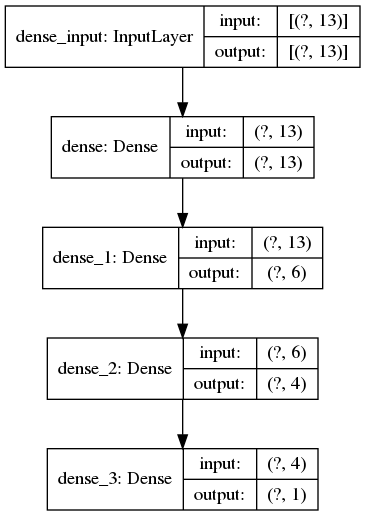

In [15]:

plot_model(model, to_file='model.png',show_shapes=True)

Evaluacion

In [16]:
x_val = x_train[300:,]
y_val = y_train[300:,]

In [17]:
x_val.shape

(104, 13)

In [18]:
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
13/13 [==============================] - 0s 27ms/step - loss: 587.4309 - mean_absolute_percentage_error: 99.5921 - val_loss: 530.6988 - val_mean_absolute_percentage_error: 99.0879
Epoch 2/5
13/13 [==============================] - 0s 5ms/step - loss: 578.3839 - mean_absolute_percentage_error: 98.4276 - val_loss: 516.5675 - val_mean_absolute_percentage_error: 97.0863
Epoch 3/5
13/13 [==============================] - 0s 6ms/step - loss: 554.9316 - mean_absolute_percentage_error: 95.2363 - val_loss: 480.6960 - val_mean_absolute_percentage_error: 91.8371
Epoch 4/5
13/13 [==============================] - 0s 5ms/step - loss: 499.5128 - mean_absolute_percentage_error: 87.6013 - val_loss: 404.6080 - val_mean_absolute_percentage_error: 79.7668
Epoch 5/5
13/13 [==============================] - 0s 4ms/step - loss: 396.1539 - mean_absolute_percentage_error: 72.0250 - val_loss: 278.5326 - val_mean_absolute_percentage_error: 59.6993


In [19]:
model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
13/13 [==============================] - 0s 8ms/step - loss: 247.9772 - mean_absolute_percentage_error: 52.2305 - val_loss: 152.2155 - val_mean_absolute_percentage_error: 42.9664
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 143.9592 - mean_absolute_percentage_error: 46.0151 - val_loss: 128.2104 - val_mean_absolute_percentage_error: 52.1523
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 138.0747 - mean_absolute_percentage_error: 52.8376 - val_loss: 126.9068 - val_mean_absolute_percentage_error: 52.7662
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 126.9005 - mean_absolute_percentage_error: 47.7649 - val_loss: 113.6379 - val_mean_absolute_percentage_error: 45.2081
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 121.9791 - mean_absolute_percentage_error: 44.0721 - val_loss: 109.1477 - val_mean_absolute_percentage_error: 43.7849
Epoch 6/100
13/13 [==========================

4/4 [==============================] - 0s 2ms/step - loss: 39.0735 - mean_absolute_percentage_error: 18.2166


In [20]:
historia = model.fit(x_train, y_train, batch_size=32, epochs=200, validation_data=(x_val, y_val), verbose = 0)

In [21]:
import matplotlib.pyplot as plt 

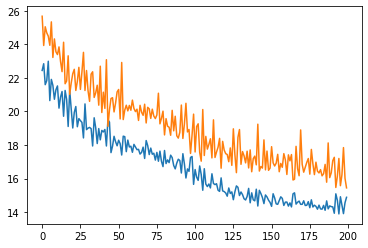

In [22]:
plt.plot(historia.history['mean_absolute_percentage_error'])
plt.plot(historia.history['val_mean_absolute_percentage_error'])

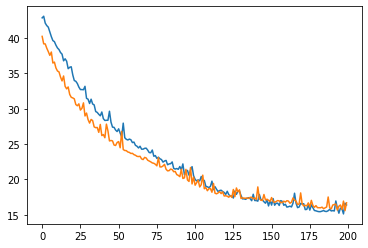

In [23]:
plt.plot(historia.history['loss'])
plt.plot(historia.history['val_loss'])